<a href="https://colab.research.google.com/github/bethalamercy/project1/blob/main/source_code_for_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import sklearn
import scipy


sns.set()

In [69]:
path="/content/diabetes.csv"
data = pd.read_csv(path)
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
data.shape

(768, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


EDA


In [ ]:
data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

Histogram Plot


<ipython-input-6-0b520119efe4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = data[feature])


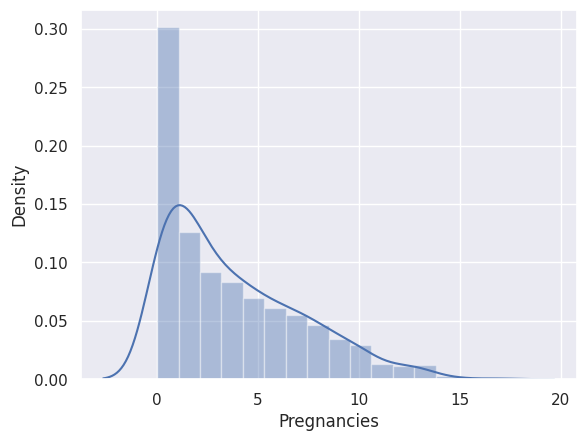

<ipython-input-6-0b520119efe4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = data[feature])


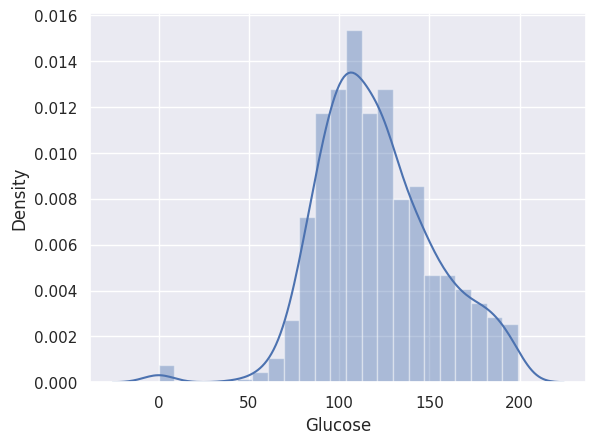

<ipython-input-6-0b520119efe4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = data[feature])


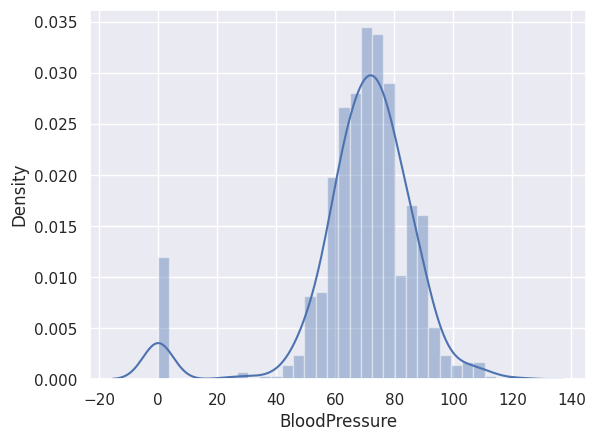

<ipython-input-6-0b520119efe4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = data[feature])


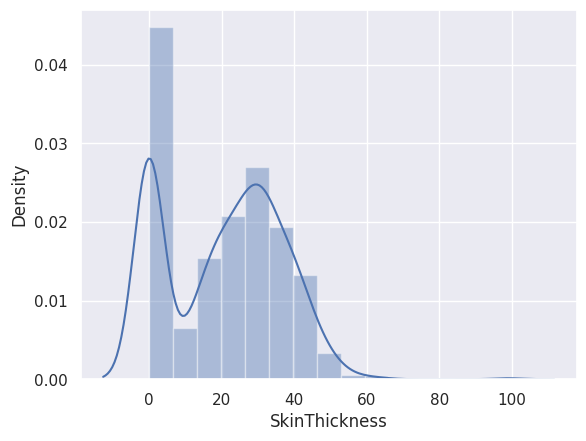

<ipython-input-6-0b520119efe4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = data[feature])


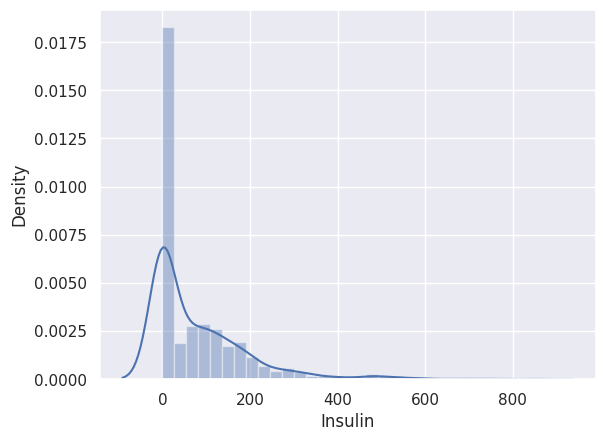

<ipython-input-6-0b520119efe4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = data[feature])


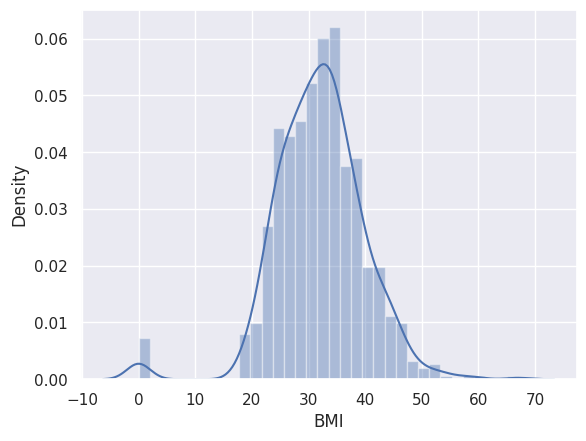

<ipython-input-6-0b520119efe4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = data[feature])


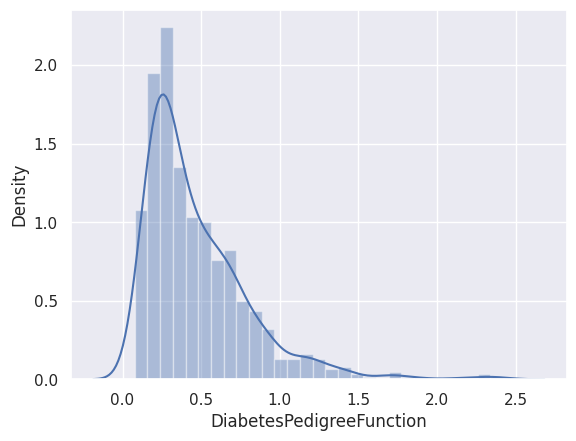

<ipython-input-6-0b520119efe4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = data[feature])


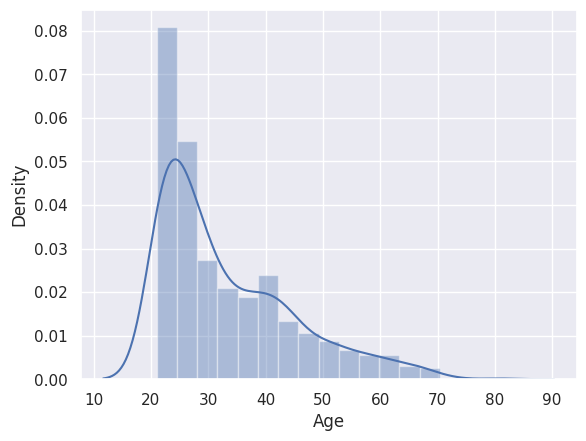

<ipython-input-6-0b520119efe4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(a = data[feature])


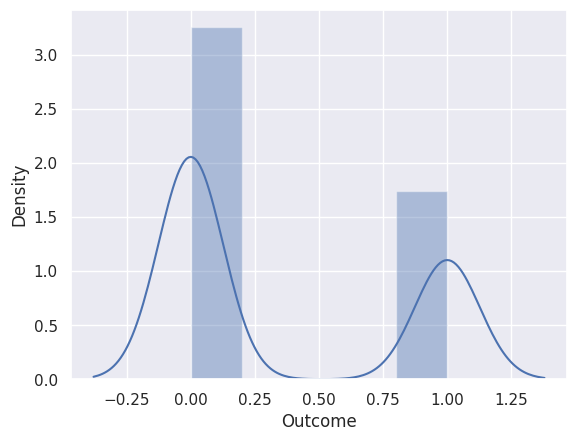

In [ ]:
data_feature = data.columns

for feature in data_feature:
    p = sns.distplot(a = data[feature])
    plt.show()

Removal of Zeros

Since there are many zeros in data and values of 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' cannot be zero, Therefore, Converriting Zeros into NaN value

In [ ]:
data_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
data[data_zeros] = np.where((data[data_zeros] == 0), np.nan, data[data_zeros])

In [ ]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

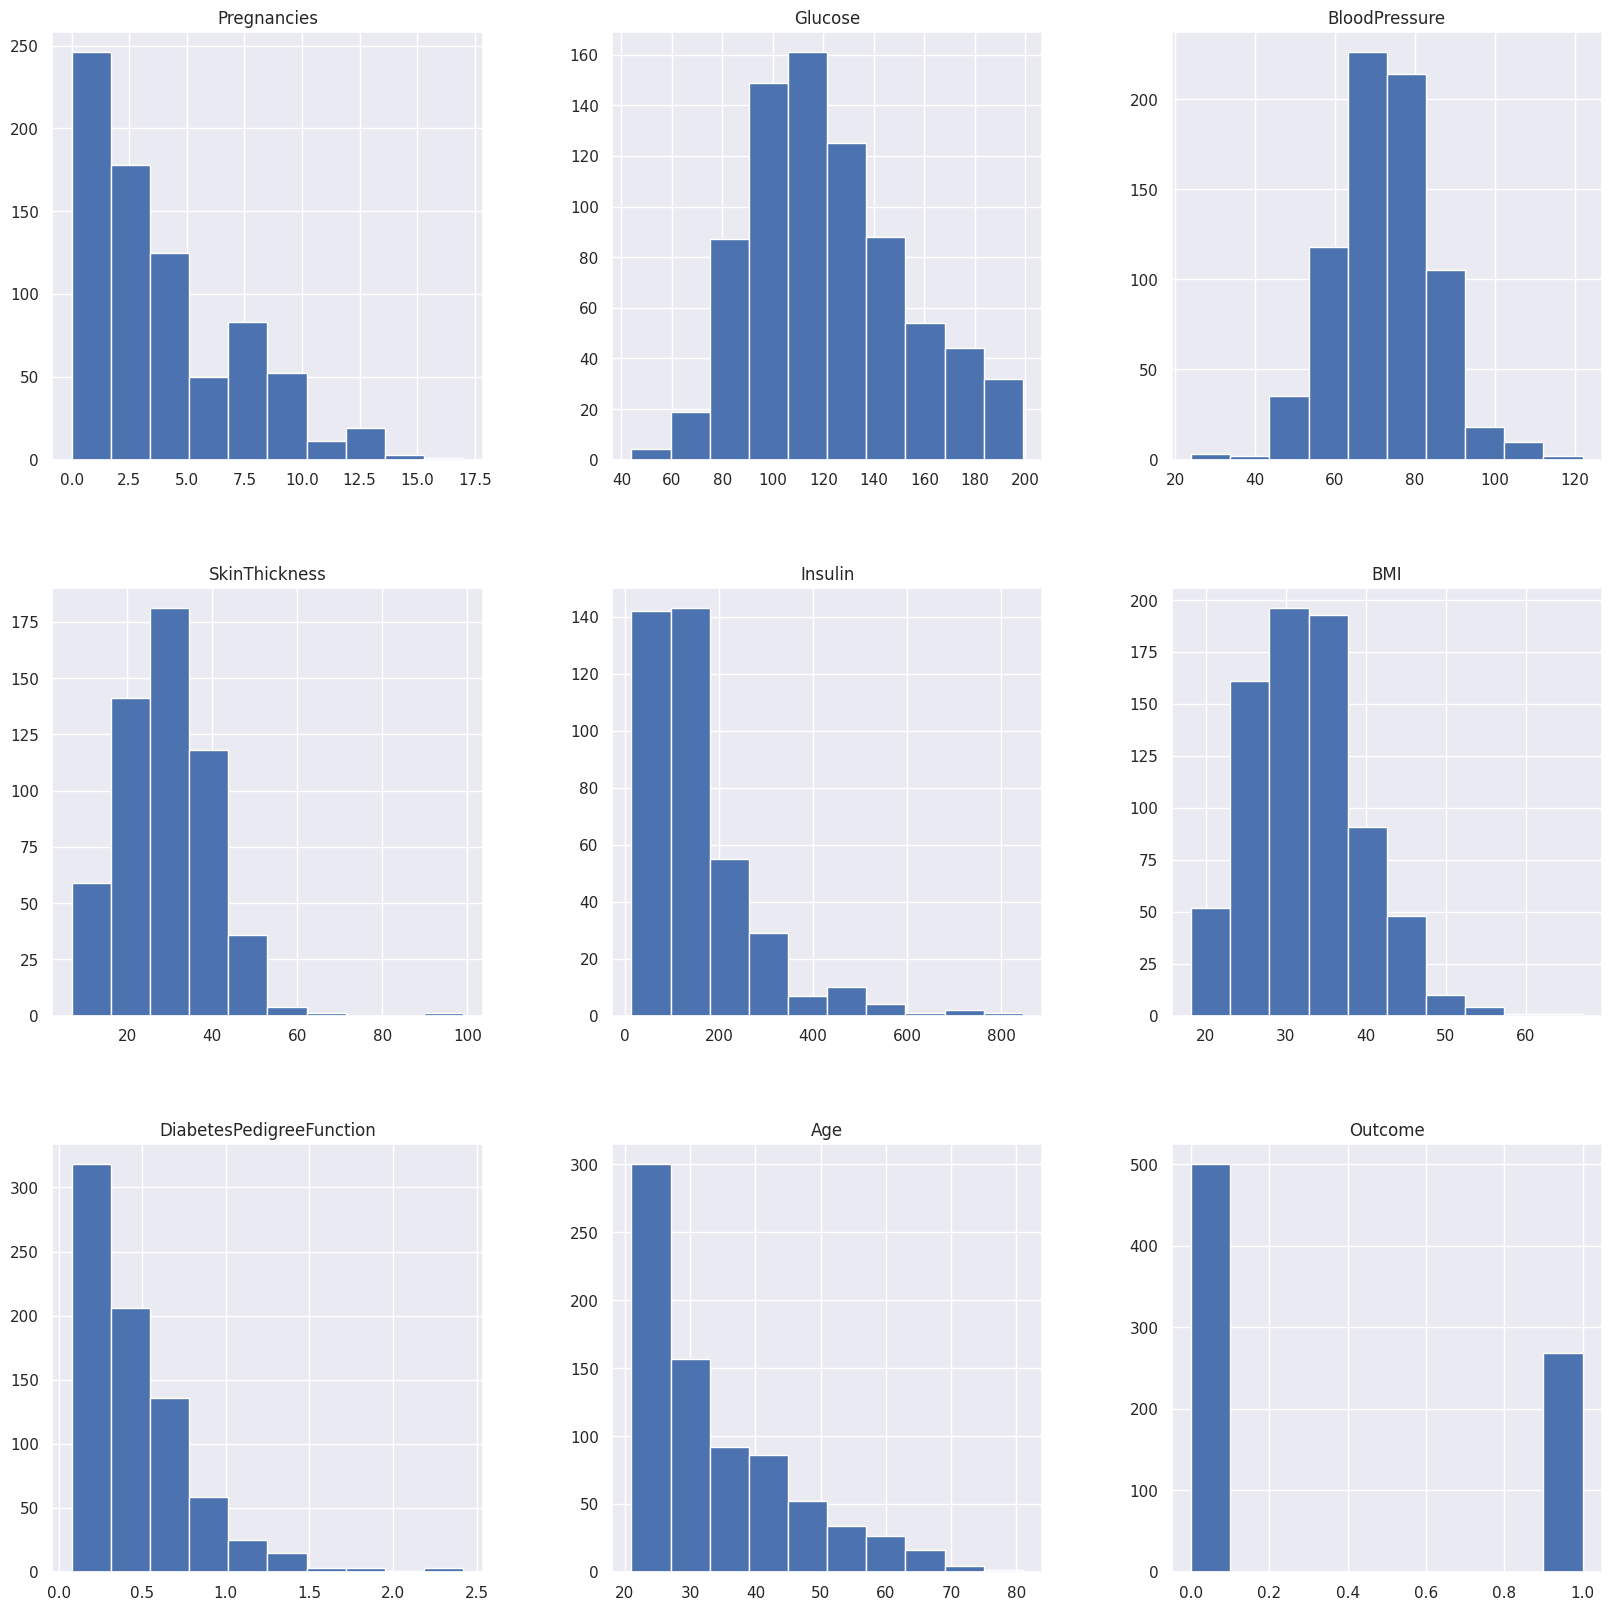

In [ ]:
p = data.hist(figsize = (20,20))

Handling Missing Values

Filling NaN values with suitable mean and median values

In [ ]:
data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   763.0  121.686763   30.535641  44.000  99.00000   
BloodPressure             733.0   72.405184   12.382158  24.000  64.00000   
SkinThickness             541.0   29.153420   10.476982   7.000  22.00000   
Insulin                   394.0  155.548223  118.775855  14.000  76.25000   
BMI                       757.0   32.457464    6.924988  18.200  27.50000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  141.00000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              29.0000   36.00000   99.00  
Insulin                   125.0000  190.00000  846.00  
BMI                        32.3000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

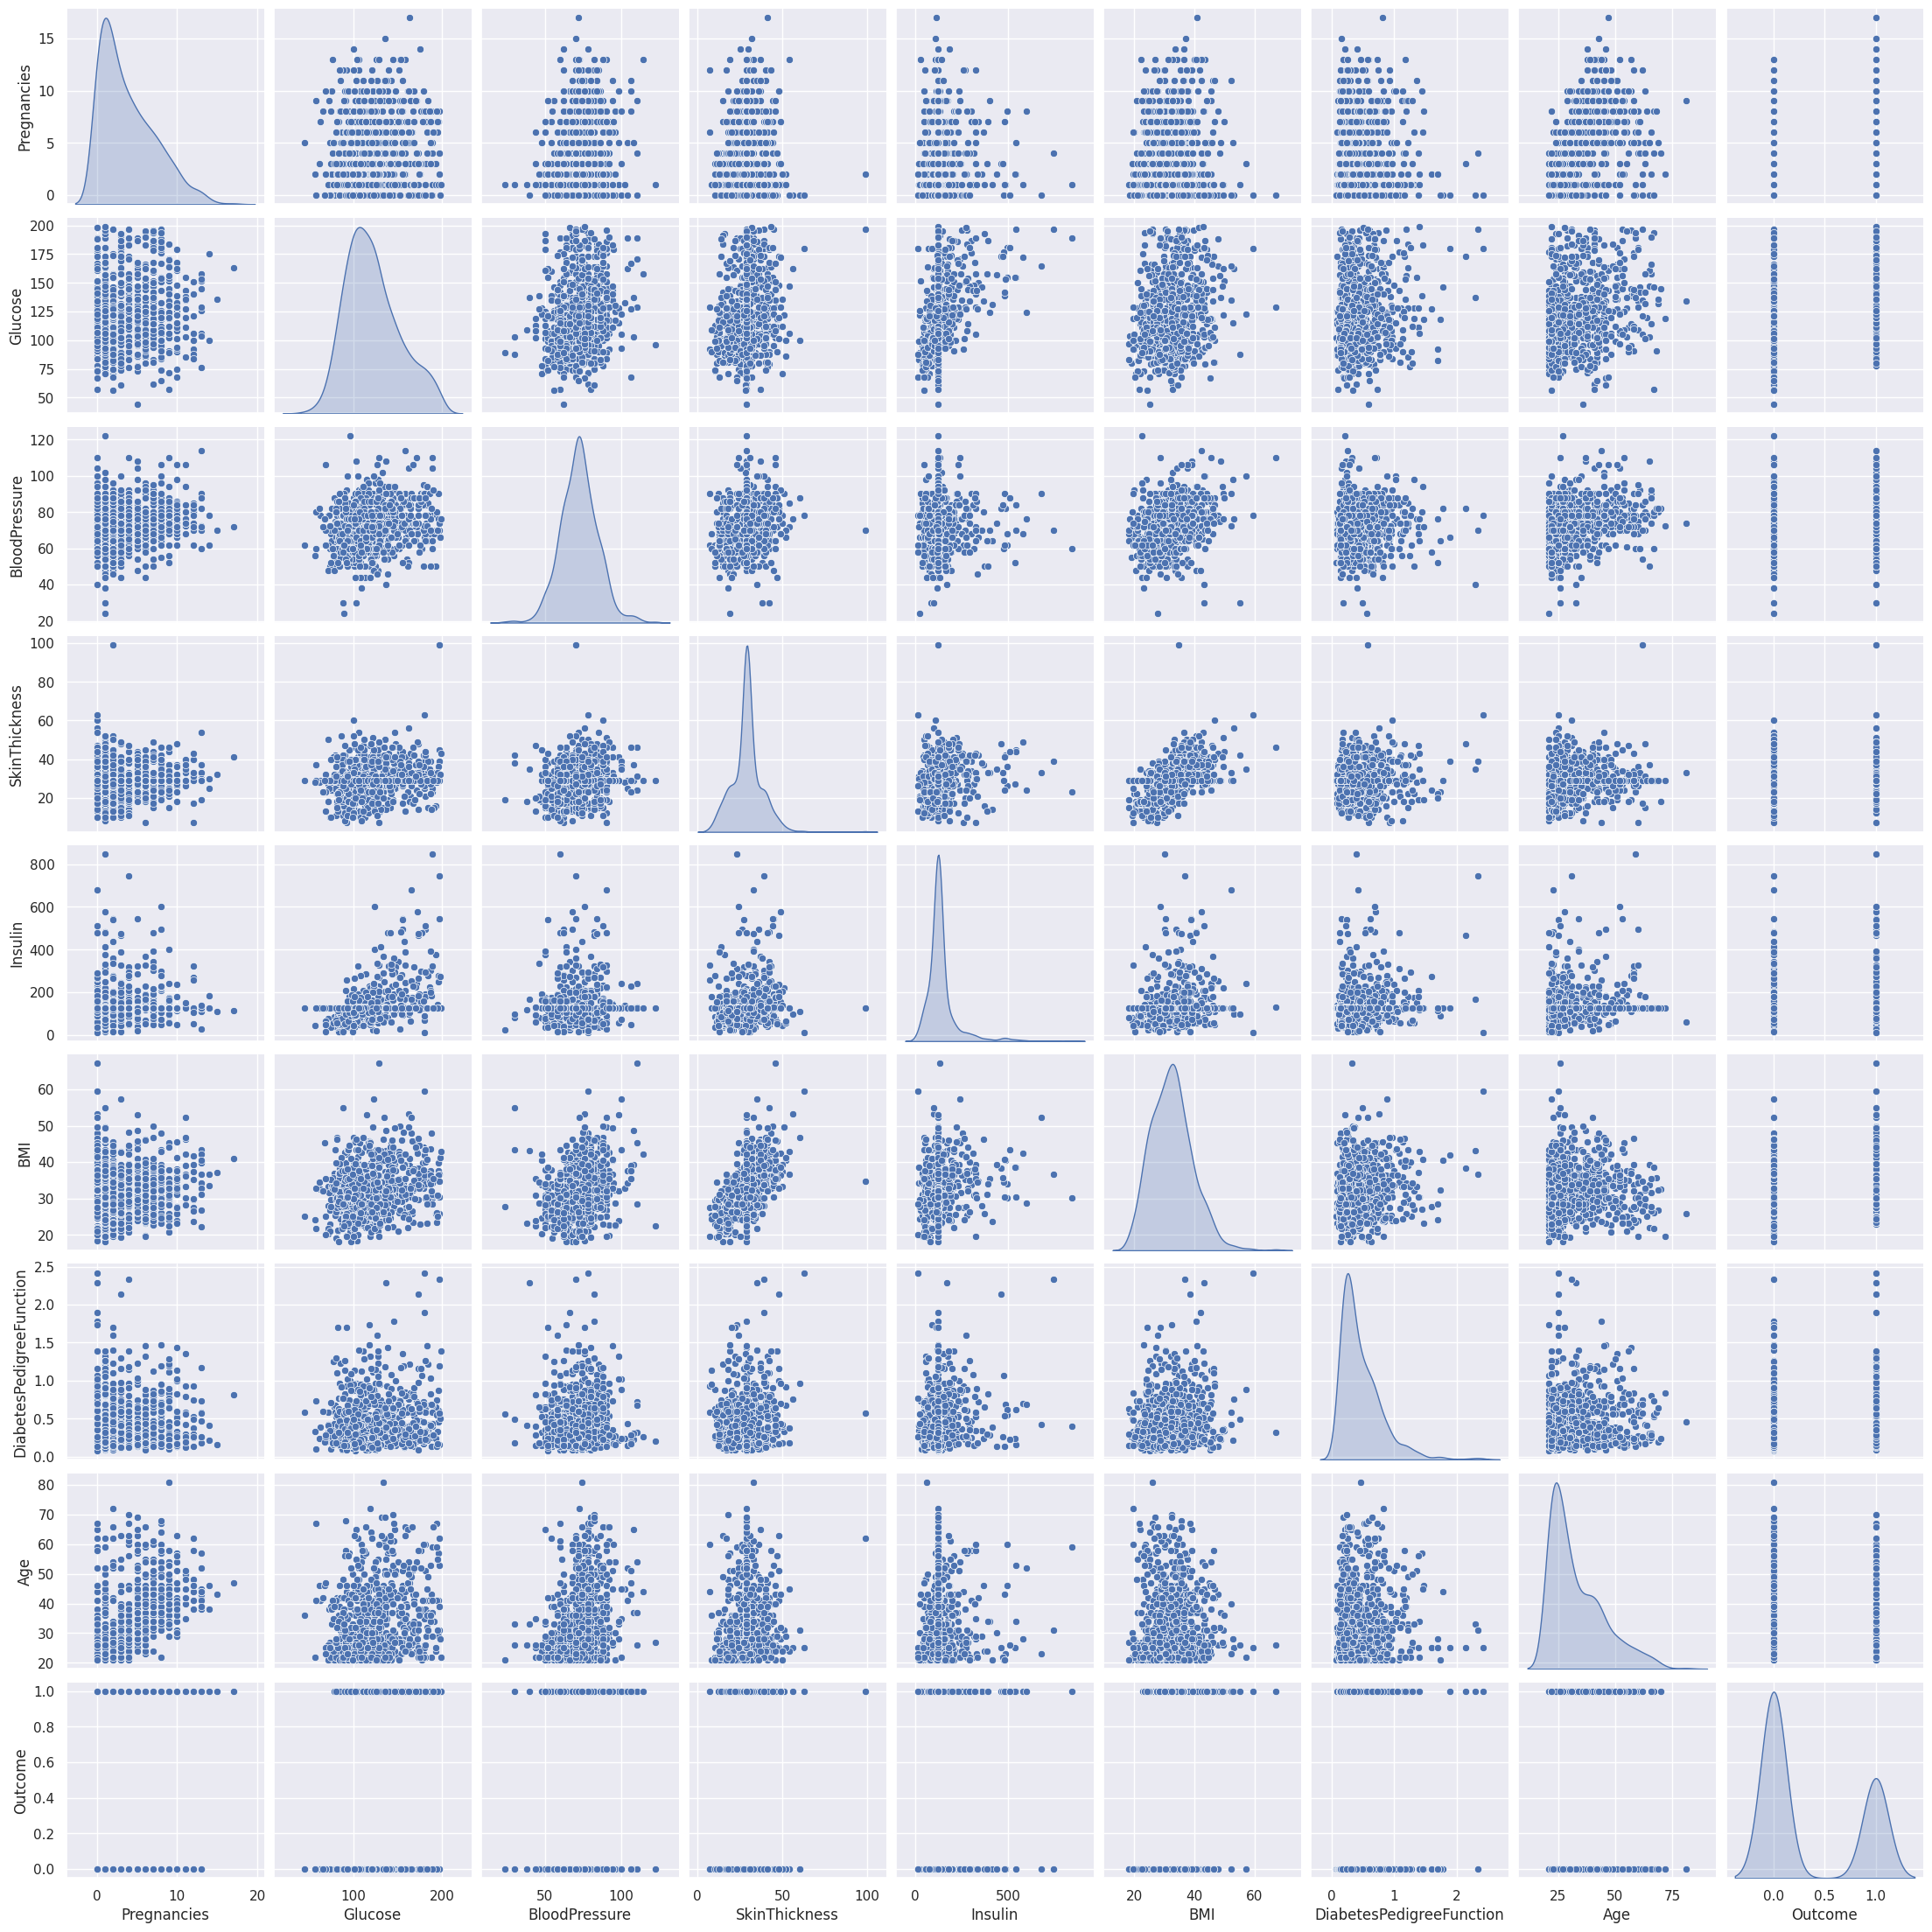

In [66]:
sns.pairplot(data,diag_kind='kde');

In [ ]:
data['Glucose'] = data['Glucose'].fillna(data['Glucose'].mean())

In [ ]:
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].mean())

<Axes: ylabel='SkinThickness'>

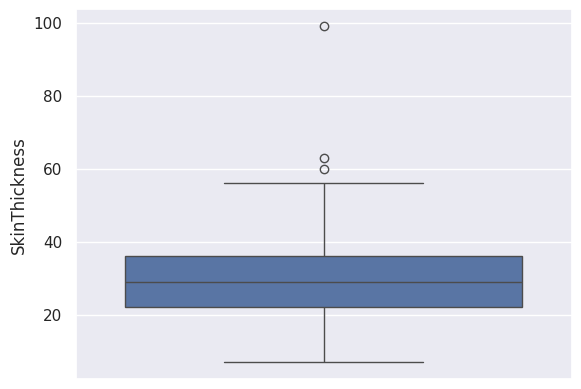

In [ ]:
sns.boxplot(y = 'SkinThickness', data = data)

In [ ]:
data['SkinThickness'].mean(), data['SkinThickness'].median()

(29.153419593345657, 29.0)

In [ ]:
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())

In [ ]:
data['Insulin'].mean(), data['Insulin'].median()

(155.5482233502538, 125.0)

In [ ]:
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())

In [ ]:
data['BMI'].mean(), data['BMI'].median()

(32.457463672391015, 32.3)

In [ ]:
data['BMI'] = data['BMI'].fillna(data['BMI'].median())

In [ ]:
for i in range(9):
    print(data.columns[i])

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


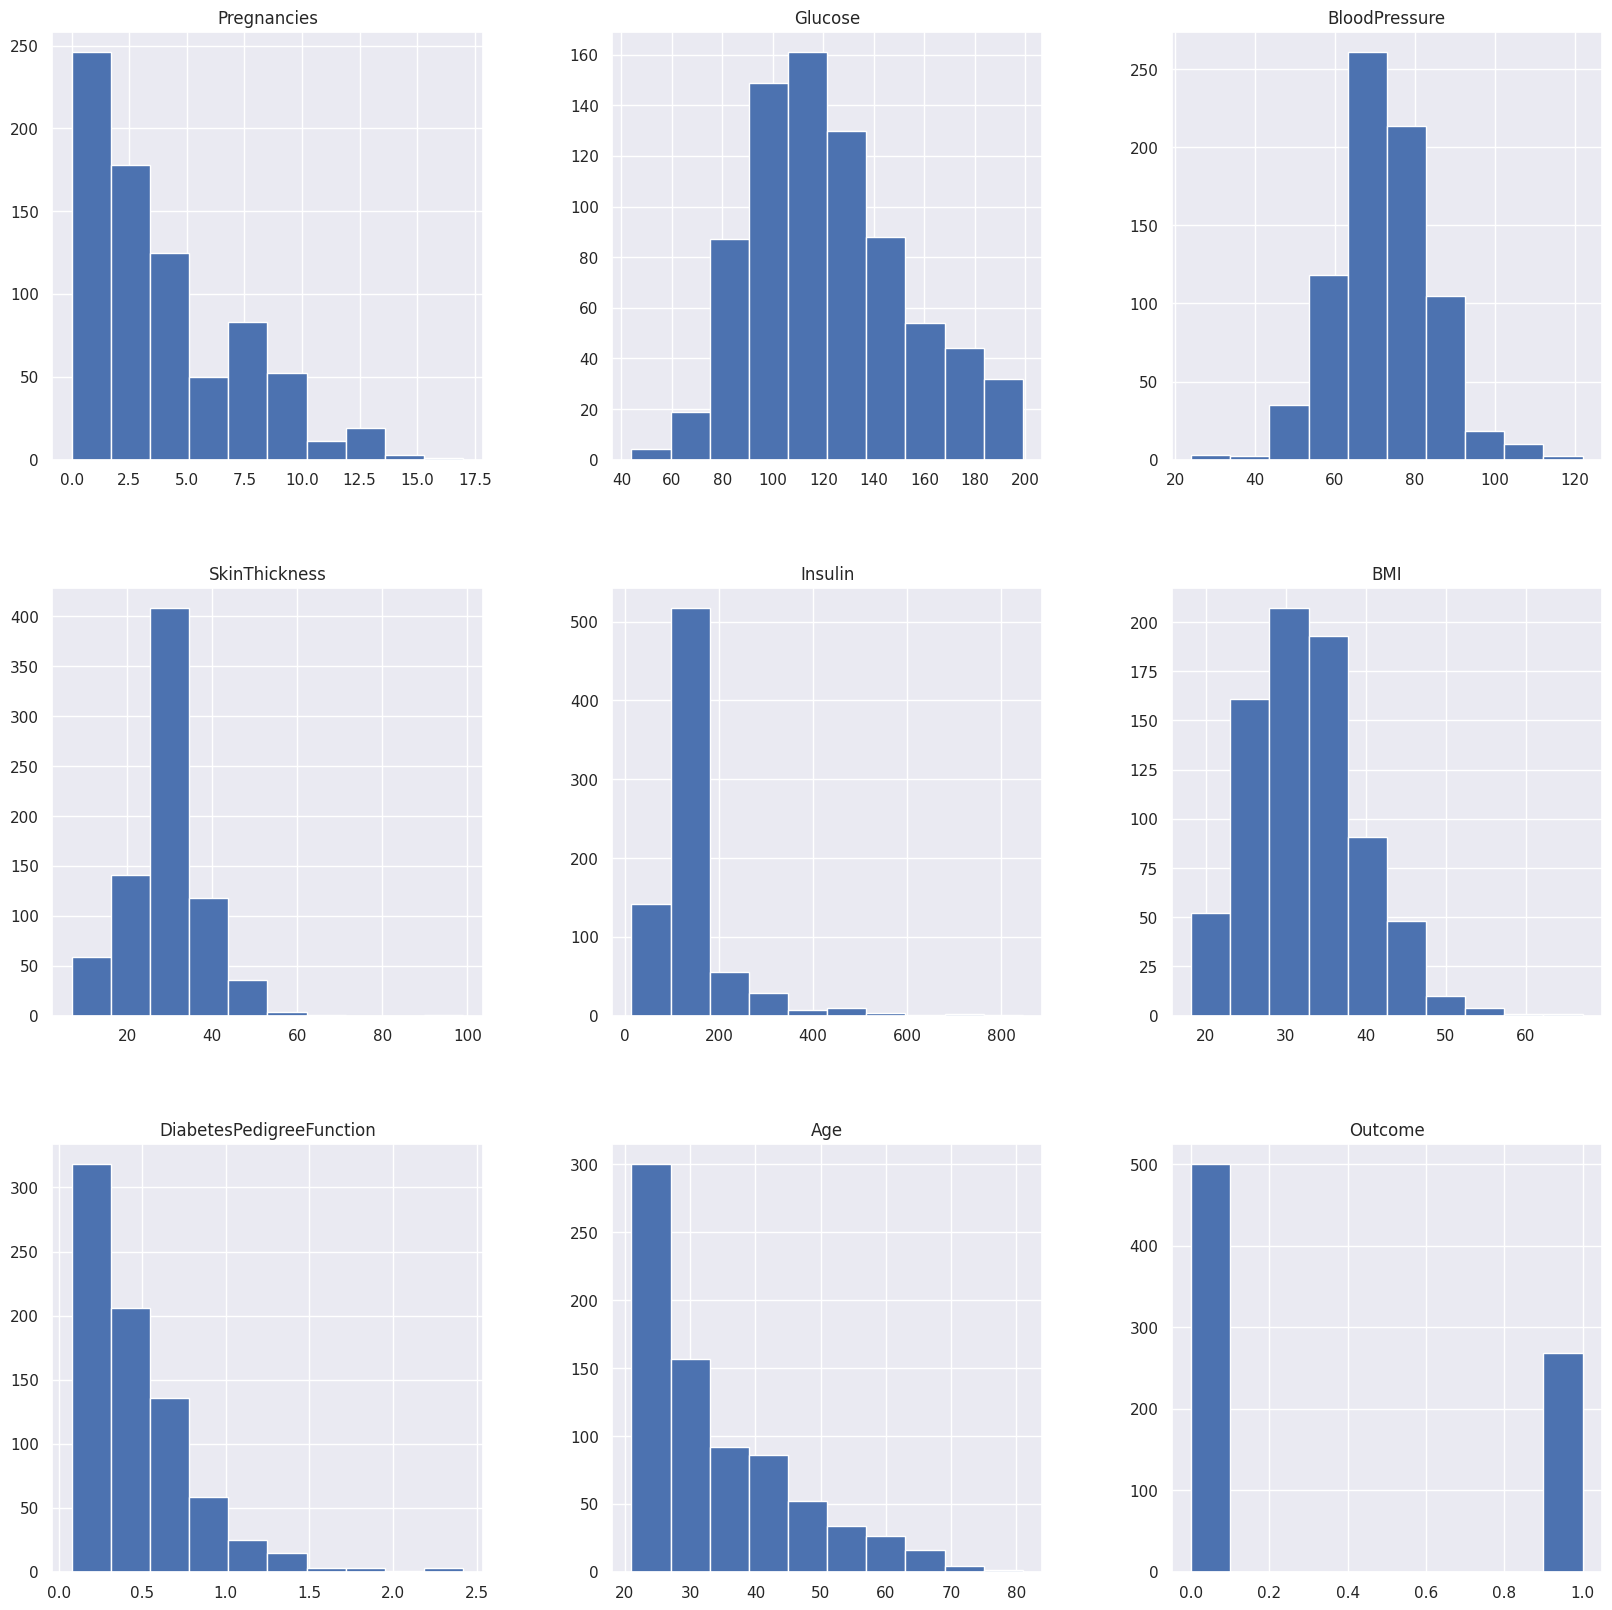

In [ ]:
p = data.hist(figsize = (20,20))


Pair Plot to see Distribution of all data at a time and dependencies

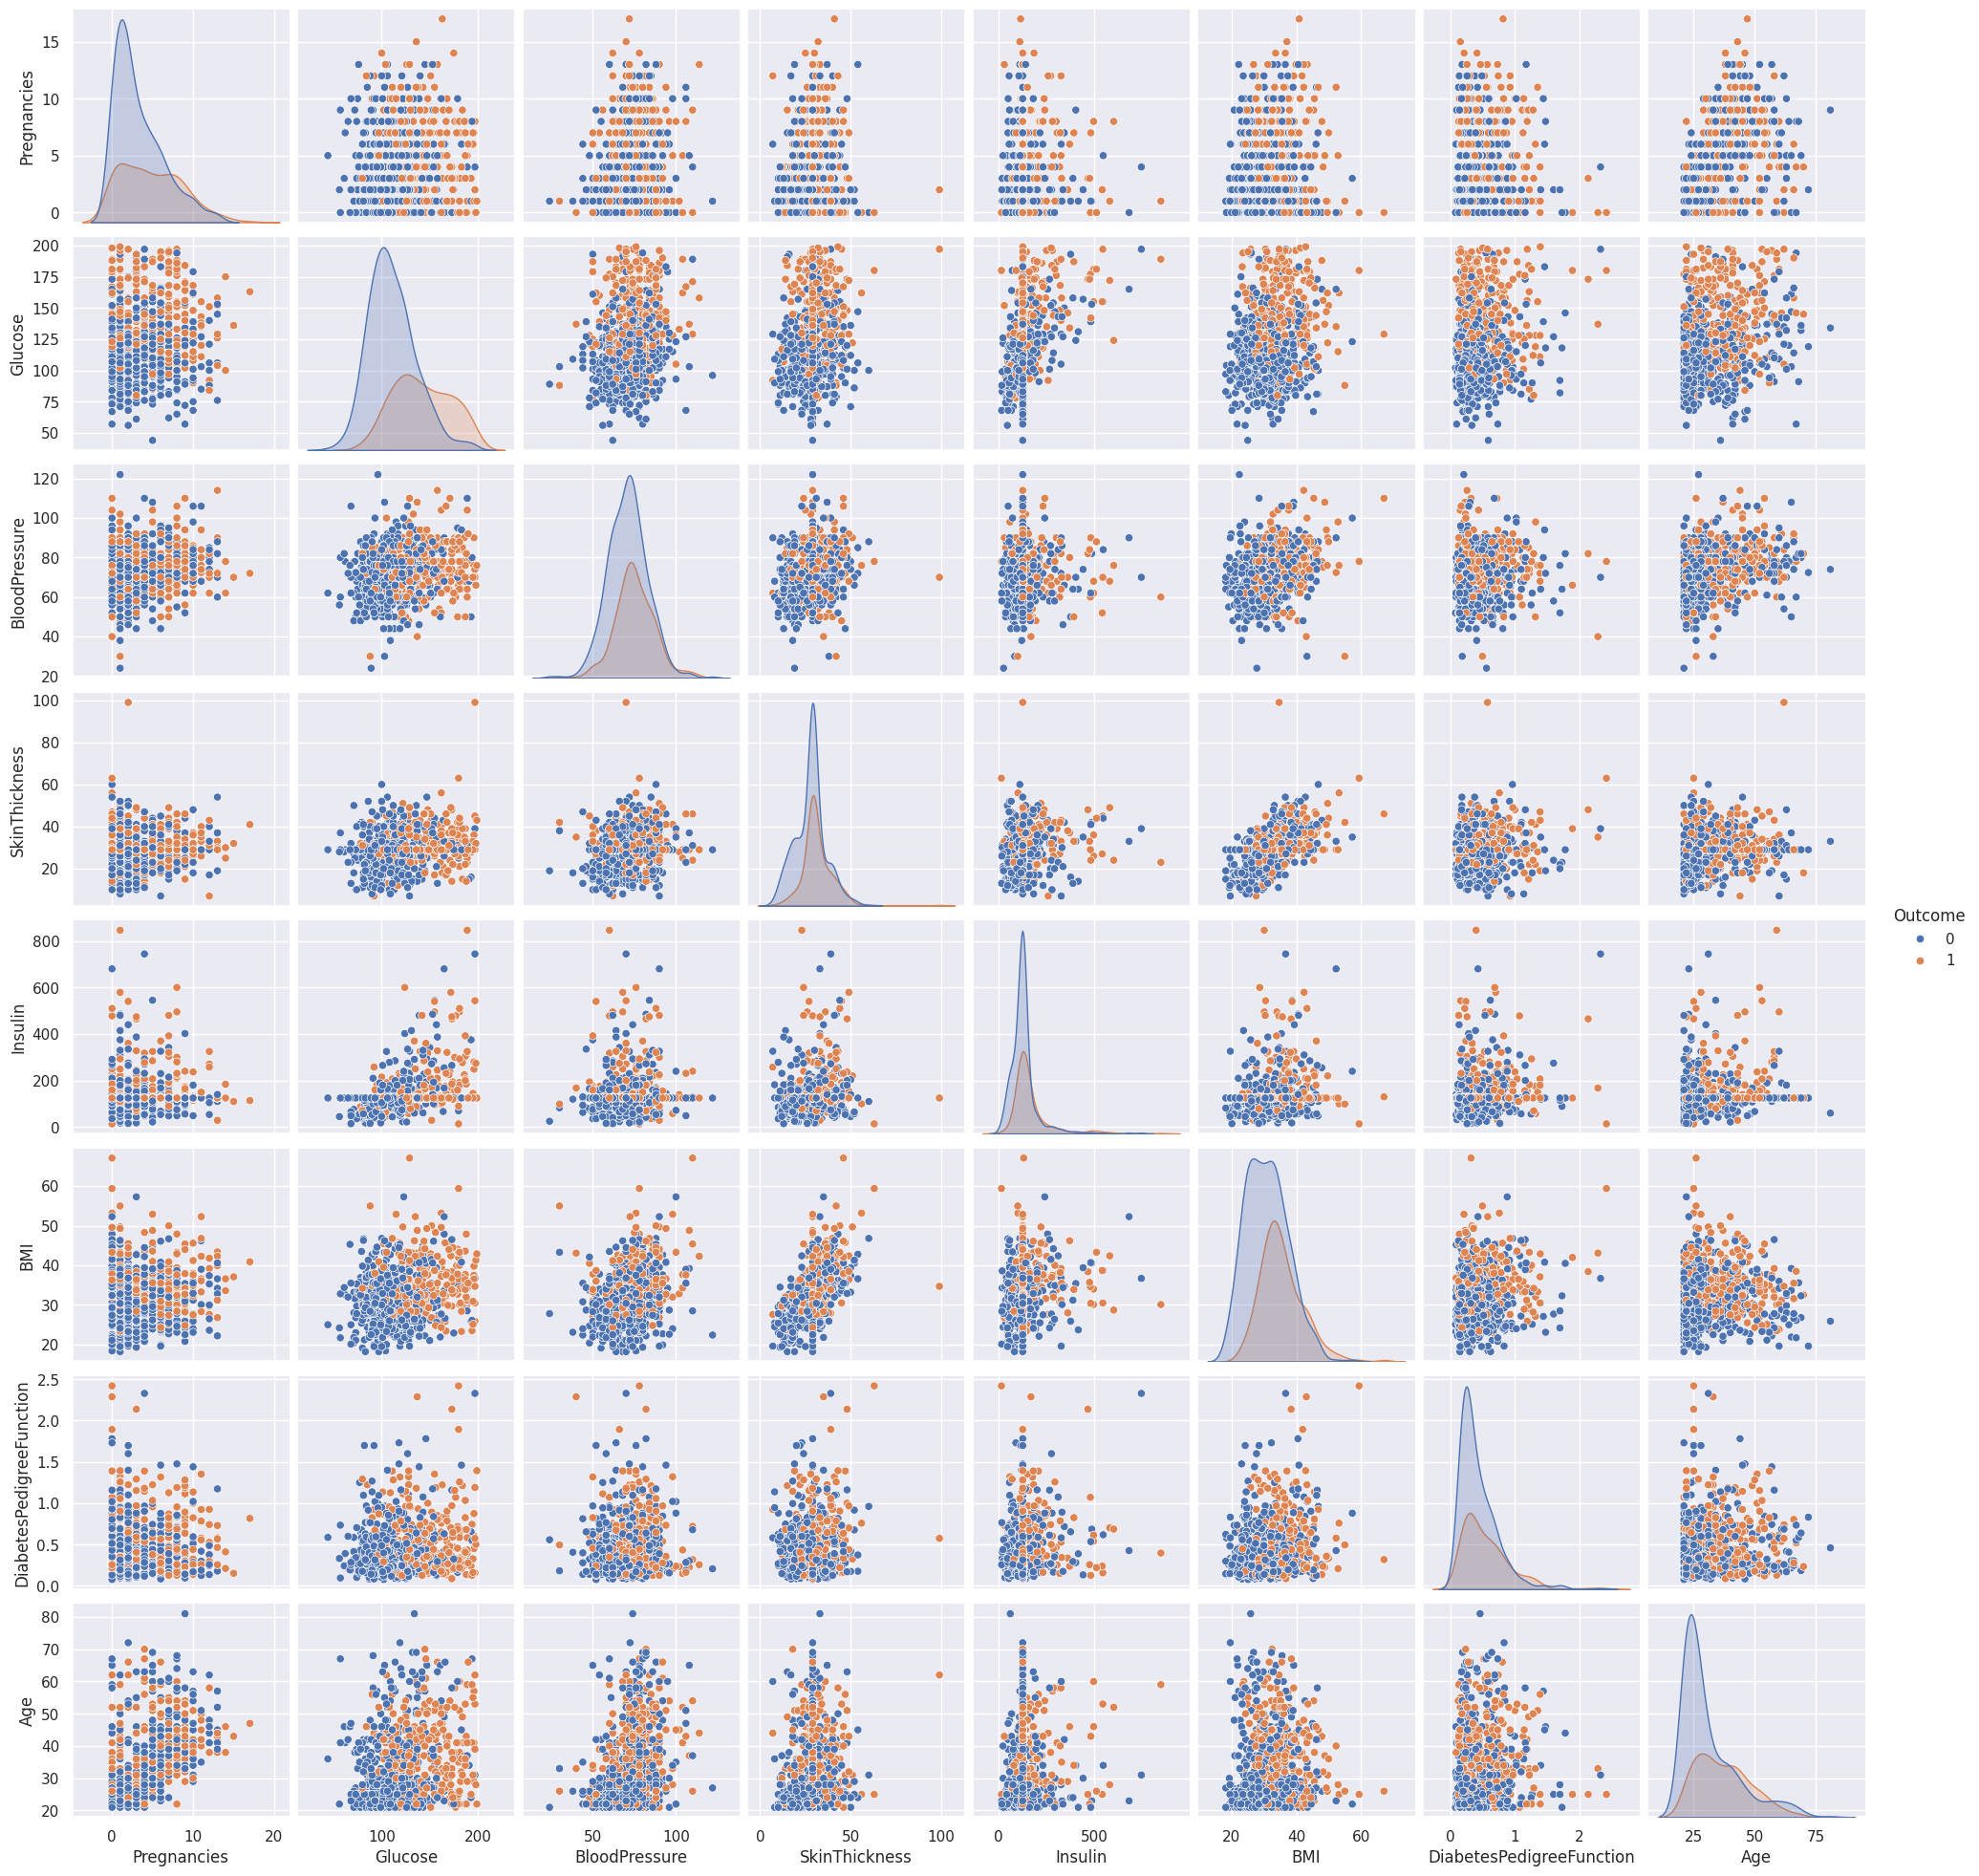

In [ ]:
sns.pairplot(data =data, hue = 'Outcome')
plt.show()

Heat Map

Gives Relation of different attribute with each other

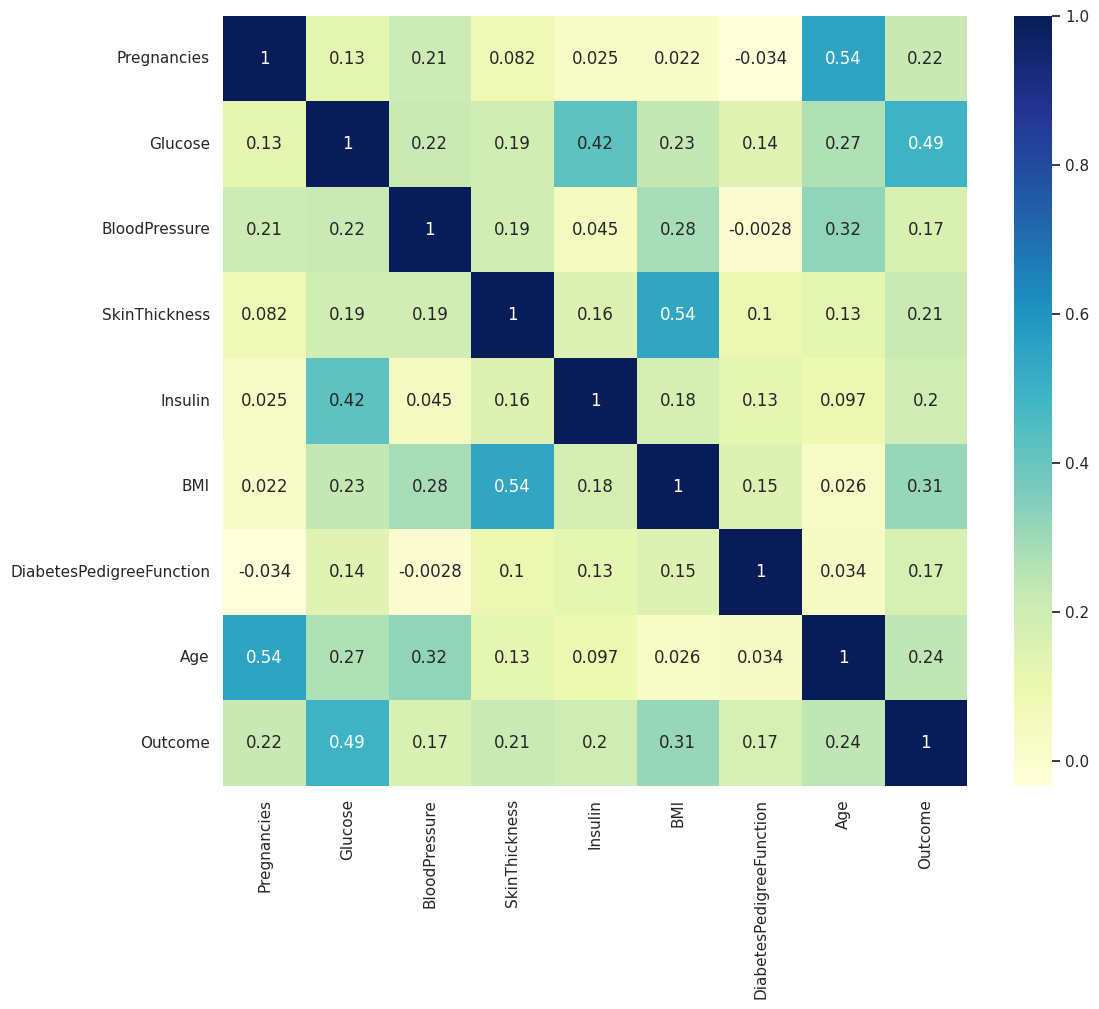

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")
plt.show()


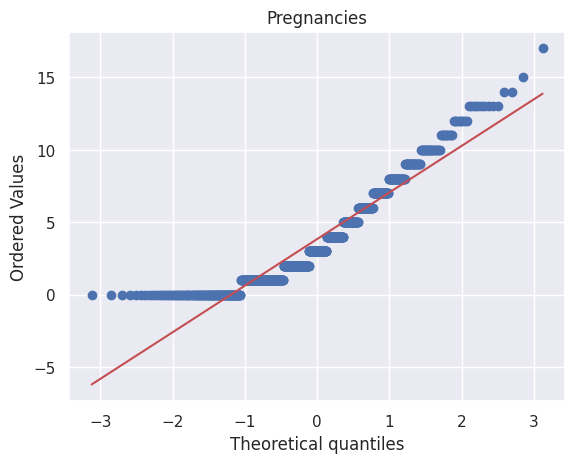

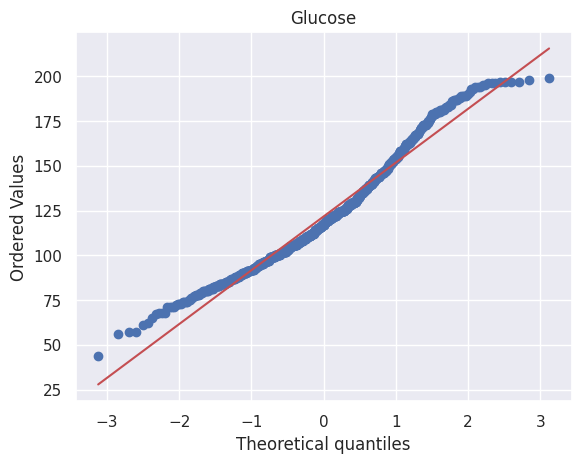

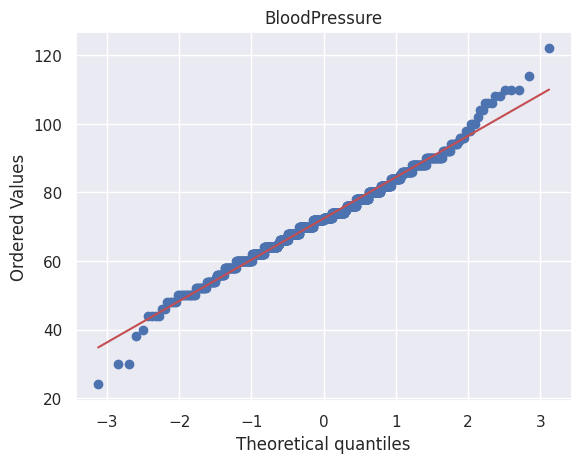

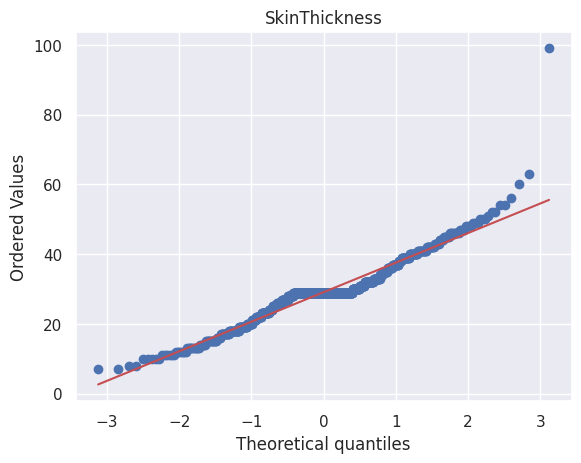

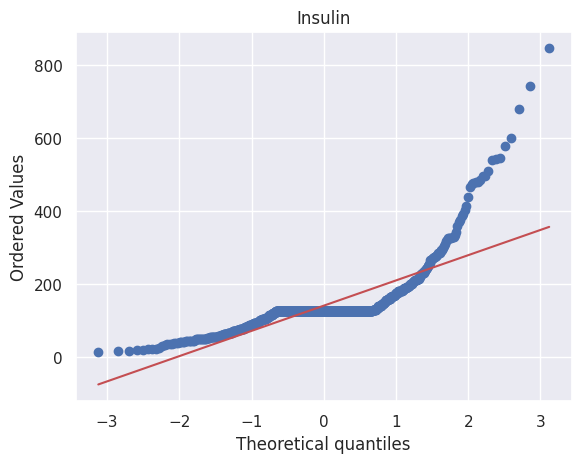

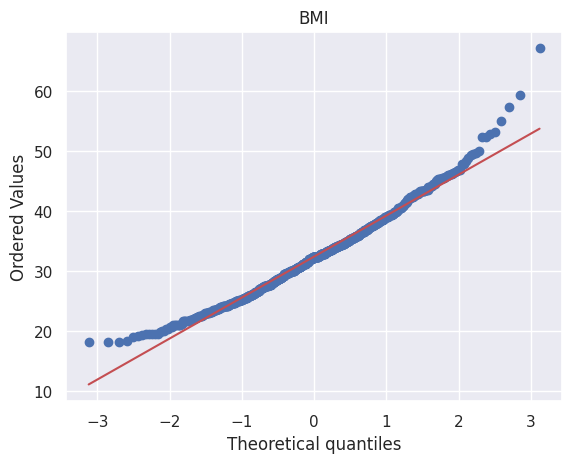

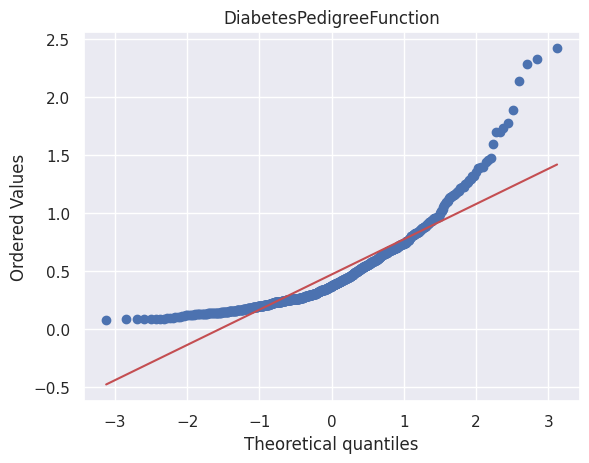

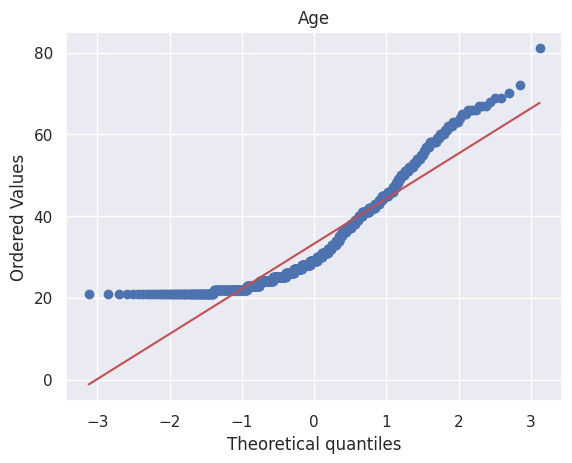

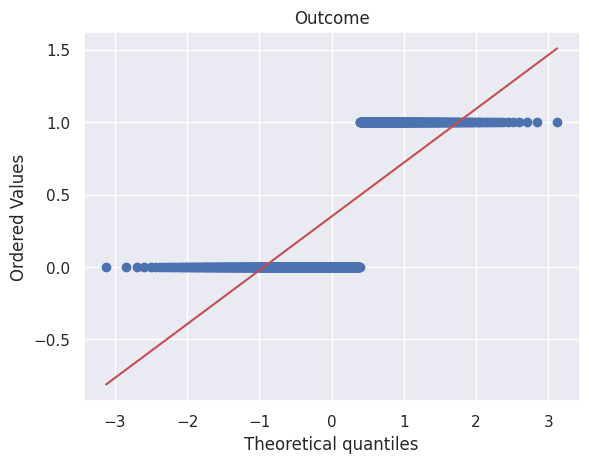

In [ ]:
from scipy import stats
for feature in data.columns:
    stats.probplot(data[feature], plot = plt)
    plt.title(feature)
    plt.show()

Standardizing Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()


In [ ]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


In [ ]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

Splitting data into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


Fitting data in various models

In [ ]:
def svm_classifier(X_train, X_test, y_train, y_test):

    classifier_svm = SVC(kernel = 'rbf', random_state = 0)
    classifier_svm.fit(X_train, y_train)

    y_pred = classifier_svm.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")

In [ ]:
def knn_classifier(X_train, X_test, y_train, y_test):

    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")

In [ ]:
def naive_classifier(X_train, X_test, y_train, y_test):

    classifier_naive = GaussianNB()
    classifier_naive.fit(X_train, y_train)

    y_pred = classifier_naive.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_naive.score(X_train, y_train)}\nTest score : {classifier_naive.score(X_test, y_test)}")

In [ ]:
def tree_classifier(X_train, X_test, y_train, y_test):

    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_tree.fit(X_train, y_train)

    y_pred = classifier_tree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")


In [ ]:
def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred = classifier_forest.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")


In [ ]:
def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Naive:\n")
    naive_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Decision Tree:\n")
    tree_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Random Forest:\n")
    forest_classifier(X_train, X_test, y_train, y_test)

In [ ]:
print_score(X_train, X_test, y_train, y_test)

SVM:

Train score : 0.758957654723127
Test score : 0.7922077922077922
----------------------------------------------------------------------------------------------------

KNN:

Train score : 0.8013029315960912
Test score : 0.7662337662337663
----------------------------------------------------------------------------------------------------

Naive:

Train score : 0.745928338762215
Test score : 0.7857142857142857
----------------------------------------------------------------------------------------------------

Decision Tree:

Train score : 1.0
Test score : 0.6883116883116883
----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 1.0
Test score : 0.8116883116883117


Performance Metrics

In [ ]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[95, 12],
       [16, 31]])

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted    0   1  All
True                   
0           95  12  107
1           16  31   47
All        111  43  154

Checking data is balanced or not

In [ ]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Classification Report (Accuracy, Precision, Recall, F1-score)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.89      0.87       107
           1       0.72      0.66      0.69        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.82       154



Getting probability instead of A/B test

In [ ]:
y_pred_prob = classifier_forest.predict_proba(X_test)[:,1]
y_pred_prob

array([0.91, 0.21, 0.08, 0.59, 0.09, 0.02, 0.85, 0.86, 0.35, 0.46, 0.7 ,
       0.83, 0.08, 0.27, 0.26, 0.5 , 0.82, 0.01, 0.39, 0.17, 0.61, 0.14,
       0.14, 0.2 , 0.02, 0.39, 0.03, 0.91, 0.01, 0.14, 0.35, 0.21, 0.17,
       0.6 , 0.05, 0.72, 0.46, 0.07, 0.26, 0.59, 0.23, 0.16, 0.14, 0.81,
       0.7 , 0.1 , 0.05, 0.1 , 0.34, 0.21, 0.42, 0.1 , 0.82, 0.62, 0.26,
       0.04, 0.2 , 0.39, 0.3 , 0.56, 0.69, 0.66, 0.05, 0.63, 0.85, 0.46,
       0.67, 0.15, 0.65, 0.27, 0.1 , 0.18, 0.11, 0.85, 0.88, 0.4 , 0.19,
       0.7 , 0.24, 0.26, 0.36, 0.36, 0.2 , 0.  , 0.16, 0.21, 0.1 , 0.24,
       0.86, 0.15, 0.34, 0.23, 0.1 , 0.03, 0.72, 0.09, 0.37, 0.31, 0.59,
       0.62, 0.18, 0.01, 0.17, 0.  , 0.68, 0.7 , 0.11, 0.6 , 0.04, 0.5 ,
       0.07, 0.52, 0.5 , 0.53, 0.6 , 0.65, 0.03, 0.35, 0.14, 0.91, 0.38,
       0.38, 0.16, 0.31, 0.06, 0.  , 0.31, 0.4 , 0.41, 0.47, 0.5 , 0.3 ,
       0.05, 0.69, 0.18, 0.59, 0.29, 0.54, 0.4 , 0.17, 0.02, 0.81, 0.  ,
       0.13, 0.74, 0.02, 0.05, 0.12, 0.16, 0.41, 0.

Evaluating FPR, TPR, Threshold

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
print("FPR:\n\n", fpr)


print("-"*100)

print("TPR:\n\n", tpr)

FPR:

 [0.         0.00934579 0.00934579 0.00934579 0.01869159 0.01869159
 0.01869159 0.02803738 0.02803738 0.03738318 0.04672897 0.04672897
 0.05607477 0.05607477 0.06542056 0.07476636 0.07476636 0.08411215
 0.08411215 0.10280374 0.11214953 0.11214953 0.13084112 0.14018692
 0.14953271 0.1588785  0.1682243  0.17757009 0.21495327 0.21495327
 0.23364486 0.26168224 0.27102804 0.29906542 0.30841121 0.31775701
 0.3364486  0.37383178 0.41121495 0.43925234 0.46728972 0.47663551
 0.5046729  0.55140187 0.58878505 0.60747664 0.64485981 0.6635514
 0.68224299 0.71962617 0.79439252 0.8411215  0.89719626 0.93457944
 0.96261682 1.        ]
----------------------------------------------------------------------------------------------------
TPR:

 [0.         0.04255319 0.06382979 0.10638298 0.14893617 0.17021277
 0.21276596 0.23404255 0.25531915 0.27659574 0.34042553 0.38297872
 0.38297872 0.40425532 0.40425532 0.42553191 0.44680851 0.46808511
 0.4893617  0.5106383  0.57446809 0.65957447 0.70212766 0.

Plotting ROC Curve

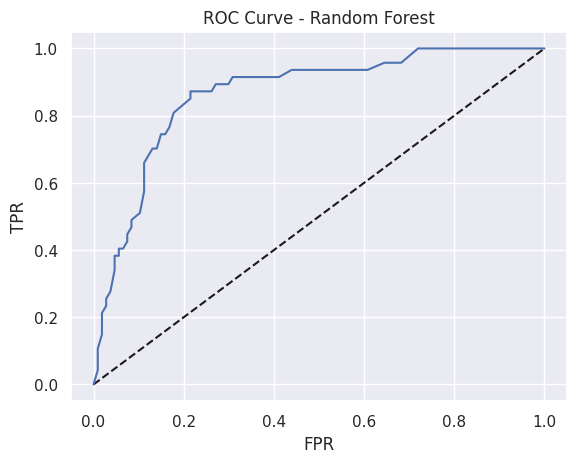

In [ ]:
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')
plt.plot(fpr, tpr, label = "Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Random Forest")
plt.show()


In [ ]:
roc_auc_score(y_test,y_pred_prob)

0.865380791409823

Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_forest, X = X_train, y = y_train, cv = 10)
print(accuracies.mean(), accuracies.std())

0.7378900052882074 0.06814117764155334


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'n_estimators': [25, 50, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [14, 20, 25, 30]
}

In [ ]:
grid_search = GridSearchCV(estimator = classifier_forest,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print('best_accuracy = ',grid_search.best_score_)
print('best_parameters = ', grid_search.best_params_)

best_accuracy =  0.7638551031200423
best_parameters =  {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 25}


In [ ]:
classifier_forest = RandomForestClassifier(criterion = 'gini', max_depth = 25, n_estimators = 200, random_state = 0)
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[94, 13],
       [13, 34]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       107
           1       0.72      0.72      0.72        47

    accuracy                           0.83       154
   macro avg       0.80      0.80      0.80       154
weighted avg       0.83      0.83      0.83       154



In [ ]:
confusion_matrix(y_test, y_pred)

array([[94, 13],
       [13, 34]])